In [1]:
%run 040.model_utils.ipynb

C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
test_cols = ['AGE_D1', 'POSTAL_CODE', 'COMMUTING_DISTANCE',
       'COMPANY_CODE',
       'COVERAGE_CODE_AUTOMOBILE', 'DEDUCTIBLE_AMOUNT',
       'DISTANCE_DRIVEN_ANNUALLY', 'DRIVERS_NUM',
       'FSA','VEHICLE_RATE_GROUP',
       'VEHICLE_RATE_GROUP_ACCIDENT_BENEFITS',
       'VEHICLE_RATE_GROUP_DIRECT_COMPENSATION',
       'VEHICLE_RATE_GROUP_COMPENSATION',
       'FULL_TERM_PREMIUM_COVERAGE', 'LIMIT_1', 'MULTICAR_DISCOUNT_INDICATOR',
       'NEW_CITY_NAME', 'PROVINCE_STATE_ABBREVIATION',
       'VEHICLE_CODE1','COVERAGE_CODE_AUTOMOBILE_CLASS','VEHICLE_USE_CODE', 'DRIVER_SEX_CODE_D1',
       'VEHICLE_ID', 'YEAR_LICENSED', 'DRIVING_AGE', 'AUTO_CLAIMS',
       'CONVICTION_NUM', 'VEHICLE_AGE', 'VIN_SERIAL_NUMBER']

time: 1e+03 µs


In [2]:
#load training data and testing data
token = lib.auth(tenant_id = 'fd3cd373-5dc9-4f59-9826-3aa2dd40d354'
               , username='John.xiang@inteliusanalytics.com'
               , password='XIANGlan960719.')
adl = core.AzureDLFileSystem(token, store_name='trugendatalake')

time: 1.62 s


In [11]:
file_list = adl.listdir('LeadGen/Raw/Silver/AUTO/2019-10-28')
for i in range(len(file_list)):
    with adl.open(file_list[i],'rb') as f:
        if i == 0:
            b0 = pickle.load(f)
           # b0 = b0[test_cols]
        else:
            b1= pickle.load(f)
            #b1 =b1[test_cols]
            b0 = pd.concat([b1,b0],axis = 0,sort=False)
    print(file_list[i])
print("load done")
pd.options.display.float_format = '{:,.2f}'.format

LeadGen/Raw/Silver/AUTO/2019-10-28/auto_broker_1.pkl
LeadGen/Raw/Silver/AUTO/2019-10-28/auto_broker_10.pkl
LeadGen/Raw/Silver/AUTO/2019-10-28/auto_broker_11.pkl
LeadGen/Raw/Silver/AUTO/2019-10-28/auto_broker_12.pkl
LeadGen/Raw/Silver/AUTO/2019-10-28/auto_broker_13.pkl
LeadGen/Raw/Silver/AUTO/2019-10-28/auto_broker_14.pkl
LeadGen/Raw/Silver/AUTO/2019-10-28/auto_broker_15.pkl
LeadGen/Raw/Silver/AUTO/2019-10-28/auto_broker_16.pkl
LeadGen/Raw/Silver/AUTO/2019-10-28/auto_broker_17.pkl
LeadGen/Raw/Silver/AUTO/2019-10-28/auto_broker_18.pkl
LeadGen/Raw/Silver/AUTO/2019-10-28/auto_broker_19.pkl
LeadGen/Raw/Silver/AUTO/2019-10-28/auto_broker_20.pkl
LeadGen/Raw/Silver/AUTO/2019-10-28/auto_broker_21.pkl
LeadGen/Raw/Silver/AUTO/2019-10-28/auto_broker_22.pkl
LeadGen/Raw/Silver/AUTO/2019-10-28/auto_broker_23.pkl
LeadGen/Raw/Silver/AUTO/2019-10-28/auto_broker_24.pkl
LeadGen/Raw/Silver/AUTO/2019-10-28/auto_broker_25.pkl
LeadGen/Raw/Silver/AUTO/2019-10-28/auto_broker_26.pkl
LeadGen/Raw/Silver/AUTO/2019-

In [12]:
features = [
"AGE_D1",
"FSA",
"POSTAL_CODE",
"COMPANY_CODE",
"COVERAGE_CODE_AUTOMOBILE",
"DEDUCTIBLE_AMOUNT",
"DISTANCE_DRIVEN_ANNUALLY",
"LIMIT_1",
"VEHICLE_CODE1",
"VEHICLE_RATE_GROUP",
"DRIVING_AGE",
"VEHICLE_AGE",
"MULTICAR_DISCOUNT_INDICATOR",
"DRIVERS_NUM",
"FULL_TERM_PREMIUM_COVERAGE",
"DRIVER_SEX_CODE_D1",
"AUTO_CLAIMS",
"CONVICTION_NUM",
"DRIVER_MARITAL_STATUS_CODE_D1",
'NEW_CITY_NAME',
'PROVINCE_STATE_ABBREVIATION',
"COVERAGE_CODE_AUTOMOBILE_CLASS",
'VIN_SERIAL_NUMBER']

time: 2.01 ms


In [13]:
full_mongo=b0[features].drop_duplicates()
print('Original data shape {}'.format(b0.shape))
print('After drop duplicates {}'.format(full_mongo.shape))

Original data shape (18641520, 47)
After drop duplicates (10642450, 23)
time: 1min 15s


In [14]:
#the dataframe has postal code, latitude, longtitude, province and city
#####     set the premium range bigger
with adl.open(('/LeadGen/Raw/Silver/AUTO/Geolocation/postal_code_api.pkl'), 'rb') as f:
    api_df = pickle.load(f)

time: 692 ms


In [15]:
vin_lookup = pd.read_json(r'C:\Users\john.lan\Desktop\Trufla scripts\MongoDB\Data_Science_models\vin_lookup.json').T.reset_index().rename(columns = {'index':'VIN_NUMBER'})

time: 53.5 s


In [16]:
full_mongo['VIN_SERIAL_NUMBER_1'] = full_mongo['VIN_SERIAL_NUMBER'].str[:8]+full_mongo['VIN_SERIAL_NUMBER'].str[9:]

time: 7.67 s


In [17]:
full_mongo = pd.merge(full_mongo,vin_lookup,left_on = 'VIN_SERIAL_NUMBER_1',right_on='VIN_NUMBER',how = 'left')

time: 25.1 s


In [14]:
#completeness check
for c in full_mongo.columns:
    print(c,len(full_mongo[full_mongo[c].notnull()])/len(full_mongo))

AGE_D1 0.9991803391113241
POSTAL_CODE 1.0
COMPANY_CODE 1.0
COVERAGE_CODE_AUTOMOBILE 0.9997233350925903
DEDUCTIBLE_AMOUNT 1.0
DISTANCE_DRIVEN_ANNUALLY 0.9979271269331079
DRIVERS_NUM 1.0
FSA 0.9999193021543412
VEHICLE_RATE_GROUP 0.9032180121349268
FULL_TERM_PREMIUM_COVERAGE 0.7600420906435028
LIMIT_1 1.0
MULTICAR_DISCOUNT_INDICATOR 0.6638260210813962
NEW_CITY_NAME 0.9999193021543412
PROVINCE_STATE_ABBREVIATION 0.9999388424941515
VEHICLE_CODE1 0.9923964592152712
COVERAGE_CODE_AUTOMOBILE_CLASS 0.9927129563538327
VEHICLE_USE_CODE 0.9981507135136293
DRIVER_SEX_CODE_D1 0.9985569271162235
YEAR_LICENSED 0.9159788874143865
DRIVING_AGE 0.9159788874143865
AUTO_CLAIMS 1.0
CONVICTION_NUM 0.9999991545045275
VEHICLE_AGE 0.9999508673186501
VIN_SERIAL_NUMBER 0.9999497399913534
time: 1min 18s


In [11]:
#get complete data for full mongo df
full_mongo['FULL_TERM_PREMIUM_COVERAGE'].fillna(0, inplace=True)
full_mongo = full_mongo[ (full_mongo['AGE_D1'].notnull())\
                        &(full_mongo['VEHICLE_CODE1'].notnull())\
                        &(full_mongo['COVERAGE_CODE_AUTOMOBILE'].notnull())\
                        &(full_mongo['COVERAGE_CODE_AUTOMOBILE_CLASS'].notnull())\
                        &(full_mongo['DRIVING_AGE'].notnull()
                        &(full_mongo['VIN_NUMBER'].notnull()))]



for c in full_mongo.columns:
    print(c, len(full_mongo[full_mongo[c].notnull()])/len(full_mongo))

AGE_D1 1.0
FSA 0.9999210740902003
POSTAL_CODE 1.0
COMPANY_CODE 1.0
COVERAGE_CODE_AUTOMOBILE 1.0
DEDUCTIBLE_AMOUNT 1.0
DISTANCE_DRIVEN_ANNUALLY 0.9985981455248747
LIMIT_1 1.0
VEHICLE_CODE1 1.0
VEHICLE_RATE_GROUP 0.8931086750925067
DRIVING_AGE 1.0
VEHICLE_AGE 1.0
MULTICAR_DISCOUNT_INDICATOR 0.6615558199030546
DRIVERS_NUM 1.0
FULL_TERM_PREMIUM_COVERAGE 1.0
DRIVER_SEX_CODE_D1 0.9993206696658512
AUTO_CLAIMS 1.0
CONVICTION_NUM 0.9999990541502154
DRIVER_MARITAL_STATUS_CODE_D1 0.9992097950522177
NEW_CITY_NAME 0.9999210740902003
PROVINCE_STATE_ABBREVIATION 0.9999450356180756
COVERAGE_CODE_AUTOMOBILE_CLASS 1.0
VIN_SERIAL_NUMBER 1.0
VIN_SERIAL_NUMBER_1 1.0
VIN_NUMBER 1.0
extendedVehicleCode 1.0
modelYear 1.0
make 1.0
model 1.0
vehicleType 1.0
bodyStyle 1.0
driveTrain 1.0
CSIOBodyType 1.0
time: 2min 51s


In [28]:
#check top coverage codes that need to be predicted
coverage_code_df = full_mongo.groupby('COVERAGE_CODE_AUTOMOBILE')['COVERAGE_CODE_AUTOMOBILE'].count().reset_index(name = 'count').sort_values(['count'], ascending=False)

time: 215 ms


In [50]:
coverage_code_list = coverage_code_df['COVERAGE_CODE_AUTOMOBILE'].unique().tolist()

time: 1.99 ms


In [51]:
for i in coverage_code_list:
    print(i ,full_mongo[full_mongo['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].nunique(),
          'Min is '+str(full_mongo[full_mongo['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].min()), 
          'Max is '+str(full_mongo[full_mongo['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].max()),
          'Mean is {:.2f}'.format(full_mongo[full_mongo['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].mean()),
          '25% is '+str(full_mongo[full_mongo['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].quantile(0.25)),
          '75% is '+str(full_mongo[full_mongo['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].quantile(0.75)),
          '95% is '+str(full_mongo[full_mongo['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].quantile(0.95)))

AB 2761 Min is 0.0 Max is 8766.0 Mean is 340.82 25% is 114.0 75% is 426.0 95% is 1012.0
TPBI 2393 Min is 0.0 Max is 5870.0 Mean is 352.28 25% is 212.0 75% is 388.0 95% is 855.0
TPDC 2344 Min is 0.0 Max is 3396.0 Mean is 227.24 25% is 115.0 75% is 293.0 95% is 549.0
UA 198 Min is 0.0 Max is 265.0 Mean is 15.48 25% is 8.0 75% is 19.0 95% is 35.0
TPPD 1166 Min is -1.0 Max is 767.0 Mean is 11.27 25% is 4.85 75% is 14.0 95% is 31.0
CMP 1027 Min is 0.0 Max is 3756.0 Mean is 118.98 25% is 48.0 75% is 147.0 95% is 341.0
COL 1482 Min is 0.0 Max is 5974.0 Mean is 217.91 25% is 122.0 75% is 261.0 95% is 495.0
DISMV 1 Min is 0.0 Max is 0.0 Mean is 0.00 25% is 0.0 75% is 0.0 95% is 0.0
DISCF 1 Min is 0.0 Max is 0.0 Mean is 0.00 25% is 0.0 75% is 0.0 95% is 0.0
44 119 Min is 0.0 Max is 277.0 Mean is 23.25 25% is 15.0 75% is 29.0 95% is 49.0
20 108 Min is 0.0 Max is 310.0 Mean is 28.96 25% is 20.0 75% is 35.0 95% is 60.0
44R 77 Min is 0.0 Max is 61.0 Mean is 14.70 25% is 7.0 75% is 23.0 95% is 29.0
D

KeyboardInterrupt: 

time: 1min 23s


In [62]:
for i in coverage_code_list:
    print(i ,full_mongo[full_mongo['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].nunique(),
          'Min is '+str(full_mongo[full_mongo['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].min()), 
          'Max is '+str(full_mongo[full_mongo['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].max()),
          'Mean is {:.2f}'.format(full_mongo[full_mongo['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].mean()),
          '25% is '+str(full_mongo[full_mongo['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].quantile(0.25)),
          '75% is '+str(full_mongo[full_mongo['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].quantile(0.75)),
          '95% is '+str(full_mongo[full_mongo['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].quantile(0.95)))

AB 4569 Min is -265.0 Max is 8766.0 Mean is 225.80 25% is 68.0 75% is 282.0 95% is 732.0
44 279 Min is -36.0 Max is 440.0 Mean is 25.35 25% is 16.0 75% is 35.0 95% is 41.0
TPDC 3885 Min is -161.0 Max is 34597.0 Mean is 214.52 25% is 112.0 75% is 270.0 95% is 511.0
TPBI 3978 Min is -408.0 Max is 70732.0 Mean is 319.11 25% is 192.0 75% is 353.0 95% is 736.0
CMP 2336 Min is -201.0 Max is 6936.0 Mean is 175.84 25% is 64.0 75% is 236.0 95% is 491.0
COL 3612 Min is -194.0 Max is 18915.0 Mean is 289.70 25% is 145.0 75% is 324.0 95% is 785.0
UA 299 Min is -13.0 Max is 268.0 Mean is 13.99 25% is 8.0 75% is 17.0 95% is 27.0
TPPD 1768 Min is -8.0 Max is 1963.0 Mean is 10.55 25% is 0.0 75% is 13.0 95% is 26.0
DISMV 1 Min is 0.0 Max is 0.0 Mean is 0.00 25% is 0.0 75% is 0.0 95% is 0.0
DISCF 1 Min is 0.0 Max is 0.0 Mean is 0.00 25% is 0.0 75% is 0.0 95% is 0.0
20 323 Min is -30.0 Max is 370.0 Mean is 32.06 25% is 21.0 75% is 44.0 95% is 60.0
DISRN 1 Min is 0.0 Max is 0.0 Mean is 0.00 25% is 0.0 75% 

full_mongo['MULTICAR_DISCOUNT_INDICATOR'] = full_mongo['MULTICAR_DISCOUNT_INDICATOR'].apply(lambda x: 1 if x == 'Y' else 0)
zcode = full_mongo[full_mongo['COVERAGE_CODE_AUTOMOBILE_CLASS']=='ZCODE']
discount_code = full_mongo[full_mongo['COVERAGE_CODE_AUTOMOBILE_CLASS']=='AUTOMOBILE_DISCOUNT_CODES']
surcharge = full_mongo[full_mongo['COVERAGE_CODE_AUTOMOBILE_CLASS']=='AUTOMOBILE_SURCHARGE_CODES']
full_mongo = full_mongo[(full_mongo.COVERAGE_CODE_AUTOMOBILE_CLASS != 'ZCODE')
            &(full_mongo.COVERAGE_CODE_AUTOMOBILE_CLASS != 'AUTOMOBILE_DISCOUNT_CODES')
            &(full_mongo.COVERAGE_CODE_AUTOMOBILE_CLASS.notnull())]

In [18]:
b1 = pd.merge(full_mongo,api_df,left_on='POSTAL_CODE',right_on='POSTAL_CODE',how='left')

time: 8.74 s


In [53]:
zcode = pd.merge(zcode,api_df,left_on='POSTAL_CODE',right_on='POSTAL_CODE',how='left')
zcode = zcode[(zcode['LONGITUDE'].notnull())
        &(zcode['DISTANCE_DRIVEN_ANNUALLY'].notnull())
        &(zcode['CITY'].notnull())
        &(b1['DRIVER_SEX_CODE_D1'].notnull())]

time: 3.63 s


In [19]:
b1 = b1[(b1['LONGITUDE'].notnull())
        &(b1['DISTANCE_DRIVEN_ANNUALLY'].notnull())
        &(b1['CITY'].notnull())
        &(b1['DRIVER_SEX_CODE_D1'].notnull())]

time: 15.4 s


In [20]:
b1.shape

(10606196, 37)

time: 7 ms


In [21]:
b1 = b1.drop_duplicates()
b1.shape

(10604615, 37)

time: 1min 2s


In [11]:
b1.columns

Index(['AGE_D1', 'FSA', 'POSTAL_CODE', 'COMPANY_CODE',
       'COVERAGE_CODE_AUTOMOBILE', 'DEDUCTIBLE_AMOUNT',
       'DISTANCE_DRIVEN_ANNUALLY', 'LIMIT_1', 'VEHICLE_CODE1',
       'VEHICLE_RATE_GROUP', 'DRIVING_AGE', 'VEHICLE_AGE',
       'MULTICAR_DISCOUNT_INDICATOR', 'DRIVERS_NUM',
       'FULL_TERM_PREMIUM_COVERAGE', 'DRIVER_SEX_CODE_D1', 'AUTO_CLAIMS',
       'CONVICTION_NUM', 'DRIVER_MARITAL_STATUS_CODE_D1', 'NEW_CITY_NAME',
       'PROVINCE_STATE_ABBREVIATION', 'COVERAGE_CODE_AUTOMOBILE_CLASS',
       'VIN_SERIAL_NUMBER', 'CITY', 'PROVINCE', 'LONGITUDE', 'LATITUDE'],
      dtype='object')

time: 3.01 ms


In [15]:
fsa = pd.DataFrame(b1['FSA'].unique().tolist(),columns=['FSA'])
fsa.to_pickle(r'C:\Users\john.lan\Desktop\Trufla scripts\trufla_test_result\fsa_list.pickle')

time: 688 ms


In [18]:
vehicle_code = pd.DataFrame(b1['VEHICLE_CODE1'].unique().tolist(),columns=['VEHICLE_CODE1'])
vehicle_code.to_pickle(r'C:\Users\john.lan\Desktop\Trufla scripts\trufla_test_result\vehicle_code_list.pickle')

time: 678 ms


In [20]:
city = pd.DataFrame(b1['CITY'].unique().tolist(),columns=['CITY'])
city.to_pickle(r'C:\Users\john.lan\Desktop\Trufla scripts\trufla_test_result\city_list.pickle')

time: 675 ms


In [49]:
zcode = zcode.drop_duplicates()

time: 2.04 s


In [118]:
import json
with open(r'C:\Users\john.lan\Desktop\zcode_0.json', 'w') as fp:
    json.dump(CONSTANT_CODE, fp)

time: 4.06 ms


In [129]:
zcode_pred = list(set(coverage_code_list) - set(list(CONSTANT_CODE.keys())))
zcode_pred_df = pd.DataFrame(zcode_pred,columns = ['COVERAGE_CODE_AUTOMOBILE'])

time: 2 ms


In [134]:
zcode_1 = pd.merge(zcode,zcode_pred_df,left_on = 'COVERAGE_CODE_AUTOMOBILE',right_on = 'COVERAGE_CODE_AUTOMOBILE',how = 'inner')

time: 1.29 s


In [106]:
coverage_code_df = zcode.groupby('COVERAGE_CODE_AUTOMOBILE')['COVERAGE_CODE_AUTOMOBILE'].count().reset_index(name = 'count').sort_values(['count'], ascending=False)
coverage_code_list = coverage_code_df['COVERAGE_CODE_AUTOMOBILE'].unique().tolist()
for i in coverage_code_list:
    print(i ,zcode[zcode['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].nunique(),
          'Min is '+str(zcode[zcode['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].min()), 
          'Max is '+str(zcode[zcode['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].max()),
          'Mean is {:.2f}'.format(zcode[zcode['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].mean()),
          '25% is '+str(zcode[zcode['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].quantile(0.25)),
          '75% is '+str(zcode[zcode['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].quantile(0.75)),
          '95% is '+str(zcode[zcode['COVERAGE_CODE_AUTOMOBILE']==i]['FULL_TERM_PREMIUM_COVERAGE'].quantile(0.95)))

ZCOMB 1 Min is 0.0 Max is 0.0 Mean is 0.00 25% is 0.0 75% is 0.0 95% is 0.0
ZDD5 1 Min is 0.0 Max is 0.0 Mean is 0.00 25% is 0.0 75% is 0.0 95% is 0.0
ZZAWE 5 Min is 0.0 Max is 100.0 Mean is 28.03 25% is 0.0 75% is 50.0 95% is 50.0
ZDDE 171 Min is 0.0 Max is 90.85714285714286 Mean is 46.86 25% is 50.0 75% is 50.0 95% is 80.0
ZCX3 92 Min is 0.0 Max is 96.0 Mean is 58.62 25% is 65.0 75% is 75.0 95% is 75.0
ZVSCD 1 Min is 0.0 Max is 0.0 Mean is 0.00 25% is 0.0 75% is 0.0 95% is 0.0
ZCSD 177 Min is 0.0 Max is 217.09090909090907 Mean is 163.26 25% is 160.0 75% is 160.0 95% is 185.0
ZCAP 1 Min is 0.0 Max is 0.0 Mean is 0.00 25% is 0.0 75% is 0.0 95% is 0.0
ZCX2 71 Min is 0.0 Max is 76.0 Mean is 48.89 25% is 55.0 75% is 65.0 95% is 65.0
Z43O 382 Min is 0.0 Max is 430.0 Mean is 155.75 25% is 65.0 75% is 201.0 95% is 345.0
ZCX1 57 Min is 0.0 Max is 70.0 Mean is 46.44 25% is 50.0 75% is 60.0 95% is 60.0
ZLOYD 1 Min is 0.0 Max is 0.0 Mean is 0.00 25% is 0.0 75% is 0.0 95% is 0.0
ZDISL 1 Min is 0.

In [22]:
code_list = ['AB',
 'UA',
 'PAK09',
 'CMP',
 'TPDC',
 'TPBI',
 '44',
 'ZAFW',
 'COLOD',
 'AP',
 'MRB',
 'COL',
 'CPP',
 'ZCX2',
 'Z43O',
 '3',
 'HSL',
 'WIB',
 '19A',
 'MCP',
 'PAK06',
 'TP',
 'ZCX3',
 'DRALX',
 'ZCSD',
 'DRBLO',
 'ABOD',
 'ZZAWE',
 'ZCS3',
 '2',
 '35',
 'TPOD',
 'DCB',
 'PAK08',
 'DFB',
 'ZDDE',
 'ZRPP',
 'ZCX1',
 'UAOD',
 'TPOBI',
 'Z43S',
 'TPODC',
 '18',
 'ZC19A',
 'ZCSB',
 'ZCS2',
 'ZEVO2',
 'PAK05',
 'APOD',
 '43E',
 'ZOF6*',
 'ZCS1',
 'Z00G',
 'ZEVA',
 'ZCX5',
 'ZCX6',
 'PAK03',
 'SP',
 'IDB',
 'ZCS4',
 'Z00H',
 'ZCX4',
 'ZMMM',
 'ZRPS']

time: 2.97 ms


In [23]:
code_list_df = pd.DataFrame(code_list,columns = ['COVERAGE_CODE'])

time: 18 ms


In [24]:
discount_count = b1.groupby(['POSTAL_CODE','extendedVehicleCode','COMPANY_CODE','modelYear','AGE_D1','COVERAGE_CODE_AUTOMOBILE_CLASS','DRIVING_AGE','VIN_SERIAL_NUMBER_1'])['COVERAGE_CODE_AUTOMOBILE'].agg('count').reset_index(name="n_discounts")

time: 15.6 s


In [25]:
b1 = pd.merge(b1,discount_count,left_on = ['POSTAL_CODE','extendedVehicleCode','COMPANY_CODE','modelYear','AGE_D1','COVERAGE_CODE_AUTOMOBILE_CLASS'],right_on=['POSTAL_CODE','extendedVehicleCode','COMPANY_CODE','modelYear','AGE_D1','COVERAGE_CODE_AUTOMOBILE_CLASS'],how = 'left')

time: 54 s


In [26]:
new_train = pd.merge(b1,code_list_df,left_on = 'COVERAGE_CODE_AUTOMOBILE',right_on='COVERAGE_CODE',how = 'left')

time: 9.05 s


In [27]:
new_train = new_train[new_train['COVERAGE_CODE'].notnull()]
new_train = new_train.drop_duplicates()
print(new_train.shape)
#(5636792, 38)

(5652797, 41)
time: 49.5 s


In [28]:
with adl.open('/LeadGen/Raw/Silver/AUTO/Train_data/new_train.pkl', 'wb') as f:
    pickle.dump(new_train,f,pickle.HIGHEST_PROTOCOL)
print('file has been created')

file has been created
time: 6min 9s


In [3]:
with adl.open('/LeadGen/Raw/Silver/AUTO/Train_data/new_train.pkl', 'rb') as f:
    new_train = pickle.load(f)

time: 57.3 s


In [4]:
new_train = new_train[new_train['FSA'].notnull()]
new_train = new_train[new_train['extendedVehicleCode'].notnull()]
new_train['n_discounts'] = new_train['n_discounts'].fillna(0)

time: 6.66 s


In [14]:
new_train[(new_train['CITY']=='CALGARY')&(new_train['VEHICLE_CODE1']=='090000')&(new_train['COVERAGE_CODE']=='TP')].columns

Index(['AGE_D1', 'FSA', 'POSTAL_CODE', 'COMPANY_CODE',
       'COVERAGE_CODE_AUTOMOBILE', 'DEDUCTIBLE_AMOUNT',
       'DISTANCE_DRIVEN_ANNUALLY', 'LIMIT_1', 'VEHICLE_CODE1',
       'VEHICLE_RATE_GROUP', 'DRIVING_AGE_x', 'VEHICLE_AGE',
       'MULTICAR_DISCOUNT_INDICATOR', 'DRIVERS_NUM',
       'FULL_TERM_PREMIUM_COVERAGE', 'DRIVER_SEX_CODE_D1', 'AUTO_CLAIMS',
       'CONVICTION_NUM', 'DRIVER_MARITAL_STATUS_CODE_D1', 'NEW_CITY_NAME',
       'PROVINCE_STATE_ABBREVIATION', 'COVERAGE_CODE_AUTOMOBILE_CLASS',
       'VIN_SERIAL_NUMBER', 'VIN_SERIAL_NUMBER_1_x', 'VIN_NUMBER',
       'extendedVehicleCode', 'modelYear', 'make', 'model', 'vehicleType',
       'bodyStyle', 'driveTrain', 'CSIOBodyType', 'CITY', 'PROVINCE',
       'LONGITUDE', 'LATITUDE', 'DRIVING_AGE_y', 'VIN_SERIAL_NUMBER_1_y',
       'n_discounts', 'COVERAGE_CODE'],
      dtype='object')

time: 1.04 s


In [15]:
new_train = new_train[new_train['FULL_TERM_PREMIUM_COVERAGE']<4000]
num_cols = ['AGE_D1',
            #'LONGITUDE',
            #'LATITUDE',
            #'LIMIT_1',
            #'DEDUCTIBLE_AMOUNT',
            #'DRIVING_AGE',
            'modelYear',
            #'VEHICLE_AGE',
            'FULL_TERM_PREMIUM_COVERAGE',
            #'AUTO_CLAIMS',
            #'CONVICTION_NUM'
            'n_discounts'
           ]

target = ['FULL_TERM_PREMIUM_COVERAGE']

for col in num_cols:
    new_train[col] =pd.to_numeric(new_train[col],errors='coerce')
    #hold_out_1[col] =pd.to_numeric(hold_out_1[col],errors='coerce')
pd.set_option('float_format', '{:f}'.format)
cat_vars=['COVERAGE_CODE_AUTOMOBILE',
          'COMPANY_CODE',
          #'DRIVER_SEX_CODE_D1',
          'extendedVehicleCode',
          'PROVINCE',
          'CITY',
          #'POSTAL_CODE',
          'FSA',
          #'CSIOBodyType',
          #'make',
          #'model'
        ]
for i in cat_vars:
    new_train[i] = new_train[i].astype('category')

time: 17.8 s


In [16]:
input_cols = ['CITY',
              'COMPANY_CODE',
              'COVERAGE_CODE_AUTOMOBILE',
              #'POSTAL_CODE',
              'FSA',
              'PROVINCE',
              'extendedVehicleCode',
              #'make',
              #'model',
              #'CSIOBodyType',
              'AGE_D1',
              #'LIMIT_1',
              #'DEDUCTIBLE_AMOUNT',
              'modelYear',
              #'LONGITUDE',
              #'LATITUDE',
              #'DRIVING_AGE'
              #'n_discounts'
             ]

time: 995 µs


In [17]:
#split train data, test data and validation data
x_train = new_train[input_cols]
y_train = new_train[target]

time: 348 ms


In [18]:
#x_train, x_z_val, y_train, y_z_val = train_test_split(x_train, y_train, test_size=0.10, random_state=99)

Error in callback <function LineWatcher.stop at 0x000002AD1A581F28> (for post_run_cell):


AssertionError: 

In [19]:
for i in x_train.columns:
    print(i,x_train[i].nunique())

CITY 433
COMPANY_CODE 53
COVERAGE_CODE_AUTOMOBILE 64
FSA 1065
PROVINCE 13
extendedVehicleCode 5603
AGE_D1 94
modelYear 40
time: 507 ms


In [20]:
for c in x_train.columns:
    print(c, len(x_train[x_train[c].notnull()])/len(x_train))

CITY 1.0
COMPANY_CODE 1.0
COVERAGE_CODE_AUTOMOBILE 1.0
FSA 1.0
PROVINCE 1.0
extendedVehicleCode 1.0
AGE_D1 1.0
modelYear 1.0
time: 3.12 s


In [21]:
def Light_GBM(x_train,y_train,x_test,y_test,cat_vars,early_stopping_rounds,num_boost_round,verbose_eval):
    print()
    print(format('start train light gbm model with basic setup','*^82'))
    # create dataset for lightgbm
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

    params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l1'},
    'max_depth' : -1,
    'num_leaves': 8000,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
    
    evals_result = {}  # to record eval results for plotting
    
    gbm = lgb.train(params,
                lgb_train,
                num_boost_round=num_boost_round,
                valid_sets=lgb_eval,
                early_stopping_rounds=early_stopping_rounds,
                categorical_feature=cat_vars,
                evals_result=evals_result,
                verbose_eval=verbose_eval)
    
    print(format('basic model training is done','*^82')) 
    return gbm

time: 2 ms


In [ ]:
#overfitting model
gbm = Light_GBM(x_train,y_train,x_train,y_train,cat_vars,50,1500,50)


*******************start train light gbm model with basic setup*******************


C:\Anaconda\lib\site-packages\lightgbm\basic.py:1190: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['CITY', 'COMPANY_CODE', 'COVERAGE_CODE_AUTOMOBILE', 'FSA', 'PROVINCE', 'extendedVehicleCode']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\Anaconda\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 50 rounds.
[50]	valid_0's l1: 40.1729
[100]	valid_0's l1: 34.6665
[150]	valid_0's l1: 31.5916
[200]	valid_0's l1: 29.48
[250]	valid_0's l1: 27.7807
[300]	valid_0's l1: 26.2968
[350]	valid_0's l1: 25.0915
[400]	valid_0's l1: 23.9988
[450]	valid_0's l1: 23.065


In [26]:
#lr = 0.1
gbm = Light_GBM(x_train,y_train,x_train,y_train,cat_vars,50,2000,50)


*******************start train light gbm model with basic setup*******************
Training until validation scores don't improve for 50 rounds.
[50]	valid_0's l1: 41.7669
[100]	valid_0's l1: 36.6079
[150]	valid_0's l1: 33.7639
[200]	valid_0's l1: 31.8327
[250]	valid_0's l1: 30.2475
[300]	valid_0's l1: 28.8386
[350]	valid_0's l1: 27.7438
[400]	valid_0's l1: 26.7109
[450]	valid_0's l1: 25.8032
[500]	valid_0's l1: 25.0147
[550]	valid_0's l1: 24.2041
[600]	valid_0's l1: 23.4933
[650]	valid_0's l1: 22.8604
[700]	valid_0's l1: 22.2384
[750]	valid_0's l1: 21.6215
[800]	valid_0's l1: 21.067
[850]	valid_0's l1: 20.571
[900]	valid_0's l1: 20.0868
[950]	valid_0's l1: 19.6546
[1000]	valid_0's l1: 19.2263
[1050]	valid_0's l1: 18.8351
[1100]	valid_0's l1: 18.4683
[1150]	valid_0's l1: 18.0965
[1200]	valid_0's l1: 17.77
[1250]	valid_0's l1: 17.4177
[1300]	valid_0's l1: 17.1239
[1350]	valid_0's l1: 16.8426
[1400]	valid_0's l1: 16.5602


KeyboardInterrupt: 

time: 1h 22min 31s


In [108]:
for i in new_train[['CITY',
              'COMPANY_CODE',
              'COVERAGE_CODE_AUTOMOBILE',
              'POSTAL_CODE',
              'FSA',
              'PROVINCE',
              'extendedVehicleCode',
              'make',
              'model',
              'CSIOBodyType',
              'AGE_D1',
              #'LIMIT_1',
              #'DEDUCTIBLE_AMOUNT',
              'modelYear',
              #'LONGITUDE',
              #'LATITUDE',
              #'DRIVING_AGE'
              'n_discounts',
              'FULL_TERM_PREMIUM_COVERAGE'
             ]].columns:
    print(i,new_train[['CITY',
              'COMPANY_CODE',
              'COVERAGE_CODE_AUTOMOBILE',
              'POSTAL_CODE',
              'FSA',
              'PROVINCE',
              'extendedVehicleCode',
              'make',
              'model',
              'CSIOBodyType',
              'AGE_D1',
              #'LIMIT_1',
              #'DEDUCTIBLE_AMOUNT',
              'modelYear',
              #'LONGITUDE',
              #'LATITUDE',
              #'DRIVING_AGE'
              'n_discounts',
              'FULL_TERM_PREMIUM_COVERAGE'
             ]][i].nunique())

CITY 434
COMPANY_CODE 53
COVERAGE_CODE_AUTOMOBILE 64
POSTAL_CODE 182440
FSA 1065
PROVINCE 13
extendedVehicleCode 5603
make 110
model 5580
CSIOBodyType 12
AGE_D1 94
modelYear 40
n_discounts 24
FULL_TERM_PREMIUM_COVERAGE 7883
time: 10.7 s


In [103]:
new_train[(new_train['FSA']=='T0G')&(new_train['COVERAGE_CODE_AUTOMOBILE']=='TP')&(new_train['AGE_D1']==18)][['CITY',
              'COMPANY_CODE',
              'COVERAGE_CODE_AUTOMOBILE',
              'POSTAL_CODE',
              'FSA',
              'PROVINCE',
              'extendedVehicleCode',
              'make',
              'model',
              #'CSIOBodyType',
              'AGE_D1',
              #'LIMIT_1',
              #'DEDUCTIBLE_AMOUNT',
              'modelYear',
              #'LONGITUDE',
              #'LATITUDE',
              #'DRIVING_AGE'
              'n_discounts',
              'FULL_TERM_PREMIUM_COVERAGE'
             ]].sort_values(by='FULL_TERM_PREMIUM_COVERAGE')

,CITY,COMPANY_CODE,COVERAGE_CODE_AUTOMOBILE,POSTAL_CODE,FSA,PROVINCE,extendedVehicleCode,make,model,AGE_D1,modelYear,n_discounts,FULL_TERM_PREMIUM_COVERAGE
3393021,OPPORTUNITY_NO_17,WU,TP,T0G1L0,T0G,AB,109200,TOYOTA,PRIUS 5DR,18.000000,2008.000000,1.000000,1883.000000
3251384,OPPORTUNITY_NO_17,ECON,TP,T0G1L0,T0G,AB,143900,ACURA,TL TYPE S 4DR,18.000000,2008.000000,2.000000,1912.000000
3336022,OPPORTUNITY_NO_17,WU,TP,T0G1L0,T0G,AB,227500,DODGE,CHARGER 4DR,18.000000,2006.000000,2.000000,1972.000000
3263089,OPPORTUNITY_NO_17,WU,TP,T0G1W0,T0G,AB,677603,GMC TRUCK/VAN,SIERRA 1500 SLE CREW CAB 4WD,18.000000,2006.000000,2.000000,2116.000000
3342843,OPPORTUNITY_NO_17,WU,TP,T0G1W0,T0G,AB,677603,GMC TRUCK/VAN,SIERRA 1500 SLE CREW CAB 4WD,18.000000,2006.000000,2.000000,2120.000000
3344140,OPPORTUNITY_NO_17,PEMB,TP,T0G0S0,T0G,AB,674000,GMC TRUCK/VAN,SIERRA 1500 EXT CAB 4WD,18.000000,2002.000000,1.000000,2159.000000
3275039,OPPORTUNITY_NO_17,WU,TP,T0G1L0,T0G,AB,227500,DODGE,CHARGER 4DR,18.000000,2006.000000,2.000000,2486.000000
110331,OPPORTUNITY_NO_17,WU,TP,T0G0Z0,T0G,AB,053201,HYUNDAI,ACCENT GL 4DR,18.000000,2010.000000,1.000000,2500.000000


time: 145 ms


In [96]:
new_train[(new_train['extendedVehicleCode']=='359001')&(new_train['COVERAGE_CODE_AUTOMOBILE']=='TP')&(new_train['PROVINCE']=='AB')&(new_train['modelYear']==2010)][['CITY',
              'COMPANY_CODE',
              'COVERAGE_CODE_AUTOMOBILE',
              'POSTAL_CODE',
              'FSA',
              'PROVINCE',
              'extendedVehicleCode',
              'make',
              'model',
              #'CSIOBodyType',
              'AGE_D1',
              #'LIMIT_1',
              #'DEDUCTIBLE_AMOUNT',
              'modelYear',
              #'LONGITUDE',
              #'LATITUDE',
              #'DRIVING_AGE'
              'n_discounts',
              'FULL_TERM_PREMIUM_COVERAGE'
             ]].sort_values(by='FULL_TERM_PREMIUM_COVERAGE')

,CITY,COMPANY_CODE,COVERAGE_CODE_AUTOMOBILE,POSTAL_CODE,FSA,PROVINCE,extendedVehicleCode,make,model,AGE_D1,modelYear,n_discounts,FULL_TERM_PREMIUM_COVERAGE
123523,EDMONTON,WU,TP,T5R1P2,T5R,AB,359001,FORD TRUCK/VAN,EXPEDITION MAX LIMITED 4DR 4WD,50.000000,2010.000000,2.000000,868.000000
153394,EDMONTON,WU,TP,T5R1P2,T5R,AB,359001,FORD TRUCK/VAN,EXPEDITION MAX LIMITED 4DR 4WD,50.000000,2010.000000,2.000000,781.000000
6442780,RED_DEER,CGUI,TP,T4P4A3,T4P,AB,359001,FORD TRUCK/VAN,EXPEDITION MAX LIMITED 4DR 4WD,38.000000,2010.000000,1.000000,467.000000
8091281,CLEARWATER_COUNTY,GRP,TP,T0M0N0,T0M,AB,359001,FORD TRUCK/VAN,EXPEDITION MAX LIMITED 4DR 4WD,38.000000,2010.000000,2.000000,331.000000
8135343,CLEARWATER_COUNTY,GRP,TP,T0M0N0,T0M,AB,359001,FORD TRUCK/VAN,EXPEDITION MAX LIMITED 4DR 4WD,38.000000,2010.000000,2.000000,298.000000


time: 180 ms


In [95]:
all = pd.concat([x_train,y_train],axis = 1)

time: 146 ms


In [65]:
y_train

,FULL_TERM_PREMIUM_COVERAGE
8180454,36.000000
1446635,75.000000
8650416,269.000000
3425732,211.000000
6060941,28.000000
...,...
6382793,170.000000
9577066,218.000000
1728799,73.000000
10491962,143.000000


time: 9 ms


In [67]:
y_train.iloc[3964280]

FULL_TERM_PREMIUM_COVERAGE   4.000000
Name: 1093196, dtype: float64

time: 7.96 ms


In [27]:
LightGBM_features_refined(gbm,x_train,y_train,x_train,y_train,'FULL_TERM_PREMIUM_COVERAGE')


**************start feature refined selection based on feature ranks**************
running accumulative features with corresponding metrix:
---PROVINCE, Thresh=39075869691, n=9, R2: 0.72, mae: 60.45, accuruacy_adj: 0.679---
---n_discounts, Thresh=46983900455, n=8, R2: 0.72, mae: 61.10, accuruacy_adj: 0.675---
---COMPANY_CODE, Thresh=106001227036, n=7, R2: 0.72, mae: 61.49, accuruacy_adj: 0.673---
---FSA, Thresh=106107137930, n=6, R2: 0.66, mae: 67.32, accuruacy_adj: 0.642---
---modelYear, Thresh=118727356559, n=5, R2: 0.66, mae: 67.82, accuruacy_adj: 0.639---
---extendedVehicleCode, Thresh=145665251296, n=4, R2: 0.64, mae: 71.92, accuruacy_adj: 0.618---
---CITY, Thresh=160910368293, n=3, R2: 0.62, mae: 73.48, accuruacy_adj: 0.609---
---AGE_D1, Thresh=271597599960, n=2, R2: 0.46, mae: 96.32, accuruacy_adj: 0.488---
---COVERAGE_CODE_AUTOMOBILE, Thresh=661194331597, n=1, R2: 0.36, mae: 104.39, accuruacy_adj: 0.445---
please select your refined features based on this analysis
time: 4min 1

In [ ]:
joblib.dump(gbm, r'C:\Users\john.lan\Desktop\philip_result_input_1.pkl')

In [25]:
#joblib.dump(gbm, r'C:\Users\john.lan\Desktop\philip_result_input.pkl')

['C:\\Users\\john.lan\\Desktop\\philip_result_input.pkl']

time: 1min 46s


In [87]:
#lr = 0.1
gbm = Light_GBM(x_train,y_train,x_z_val,y_z_val,cat_vars,50,4000,5)


*******************start train light gbm model with basic setup*******************
Training until validation scores don't improve for 50 rounds.
[5]	valid_0's l1: 104.387
[10]	valid_0's l1: 75.3086
[15]	valid_0's l1: 62.3465
[20]	valid_0's l1: 56.0902
[25]	valid_0's l1: 50.7968
[30]	valid_0's l1: 48.0178
[35]	valid_0's l1: 46.7168
[40]	valid_0's l1: 45.8454
[45]	valid_0's l1: 45.4228
[50]	valid_0's l1: 45.1007
[55]	valid_0's l1: 44.8599
[60]	valid_0's l1: 44.6866
[65]	valid_0's l1: 44.454
[70]	valid_0's l1: 44.3436
[75]	valid_0's l1: 44.1266
[80]	valid_0's l1: 43.9715
[85]	valid_0's l1: 43.9387
[90]	valid_0's l1: 43.9893
[95]	valid_0's l1: 43.7974
[100]	valid_0's l1: 43.7141
[105]	valid_0's l1: 43.658
[110]	valid_0's l1: 43.5663
[115]	valid_0's l1: 43.4789
[120]	valid_0's l1: 43.3994
[125]	valid_0's l1: 43.365
[130]	valid_0's l1: 43.2702
[135]	valid_0's l1: 43.1891
[140]	valid_0's l1: 43.1113
[145]	valid_0's l1: 43.062
[150]	valid_0's l1: 43.0034
[155]	valid_0's l1: 42.9406
[160]	vali

In [417]:
gbm = Light_GBM(x_train,y_train,x_z_val,y_z_val,cat_vars,100,425,5)


*******************start train light gbm model with basic setup*******************
Training until validation scores don't improve for 100 rounds.
[5]	valid_0's l2: 49037.4	valid_0's l1: 131.118
[10]	valid_0's l2: 38993.9	valid_0's l1: 112.702
[15]	valid_0's l2: 31920.5	valid_0's l1: 97.929
[20]	valid_0's l2: 25999.8	valid_0's l1: 84.3612
[25]	valid_0's l2: 22517	valid_0's l1: 75.2626
[30]	valid_0's l2: 20374.2	valid_0's l1: 69.1747
[35]	valid_0's l2: 19356.1	valid_0's l1: 66.1798
[40]	valid_0's l2: 18808.5	valid_0's l1: 64.5564
[45]	valid_0's l2: 18240.3	valid_0's l1: 62.766
[50]	valid_0's l2: 19645.3	valid_0's l1: 58.6212
[55]	valid_0's l2: 18413.2	valid_0's l1: 56.225
[60]	valid_0's l2: 19911.8	valid_0's l1: 55.1116
[65]	valid_0's l2: 21153	valid_0's l1: 58.8654
[70]	valid_0's l2: 20022.2	valid_0's l1: 55.3196
[75]	valid_0's l2: 19135.5	valid_0's l1: 53.4549
[80]	valid_0's l2: 18714.5	valid_0's l1: 52.7432
[85]	valid_0's l2: 19259.1	valid_0's l1: 54.2813
[90]	valid_0's l2: 19352	val

KeyboardInterrupt: 

time: 56min 42s


In [ ]:
model = lgb.LGBMRegressor()
parameters = {    'max_depth' : [-1],
                  'learning_rate' : [0.05],
                  'num_leaves': [25000],
                  'n_estimators': [425],
                  'min_child_weight' : [1],
                  'min_child_sample' : [10],
                  'subsample': [1.0],
                  'colsample_bytree': [1.0],
                  'scale_pos_weight': [1.0],
                  'reg_lambda':[0.0],
                  'boosting_type': ['dart'],     
                  'lambda_l1':[0.0]
             }

grid = ParameterOptimizer(model = model,
                          parameters= parameters,
                          x_train = x_train,
                          y_train = y_train,
                          cat_vars = cat_vars,
                          early_stopping_rounds = 100,
                          eval_set = [(x_z_val,y_z_val)])

In [88]:
print('Train data MAE score is {}'.format(mean_absolute_error(y_train, gbm.predict(x_train))))

Train data MAE score is 14.003503716339873
time: 1h 34min 5s


In [57]:
print('Val data MAE score is {}'.format(mean_absolute_error(y_z_val, gbm.predict(x_z_val))))
print('Train data MAE score is {}'.format(mean_absolute_error(y_train, gbm.predict(x_train))))

print('Val data R2 score is {:.2%}'.format(r2_score(y_z_val, gbm.predict(x_z_val))))
print('Train data R2 score is {:.2%}'.format(r2_score(y_train, gbm.predict(x_train))))

Val data MAE score is 42.766341377322284


KeyboardInterrupt: 

time: 4min 14s


In [37]:
joblib.dump(gbm, r'C:\Users\john.lan\Desktop\philip_result_input.pkl')

['C:\\Users\\john.lan\\Desktop\\philip_result_input.pkl']

time: 23.2 s


In [169]:
r = pd.DataFrame(grid.predict(x_z_val),columns = ['preds'])

time: 1.32 s


In [172]:
pd.concat([x_z_val.reset_index(),y_z_val.reset_index(),r],axis=1).head(20)

,index,LONGITUDE,LATITUDE,AGE_D1,COMPANY_CODE,COVERAGE_CODE_AUTOMOBILE,DISTANCE_DRIVEN_ANNUALLY,VEHICLE_CODE1,DRIVING_AGE,VEHICLE_AGE,MULTICAR_DISCOUNT_INDICATOR,DRIVERS_NUM,AUTO_CLAIMS,CONVICTION_NUM,DRIVER_SEX_CODE_D1,PROVINCE,CITY,FSA,index,FULL_TERM_PREMIUM_COVERAGE,preds
0,267159,-113.665998,53.481912,23.000000,WU,Z49Y,7000,539700,1.000000,7.000000,0,1,0,0.000000,M,AB,EDMONTON,T6M,267159,15.000000,19.811622
1,124210,-75.994068,45.440727,61.000000,GNA,ZOF6*,20000,025100,44.000000,4.000000,0,2,1,0.000000,M,ON,OTTAWA,K0A,124210,27.000000,30.204845
2,128726,-81.369638,44.495934,74.000000,TRG,ZCS1,25000,946303,54.000000,2.000000,0,2,0,0.000000,F,ON,GEORGIAN_BLUFFS,N0H,128726,0.000000,123.651656
3,48912,-82.234745,42.905148,41.000000,TRG,ZDDE,12000,099600,24.000000,13.000000,1,2,0,0.000000,M,ON,ENNISKILLEN,N0N,48912,50.000000,49.802534
4,159975,-79.125515,43.806858,65.000000,CGUI,ZCSD,5000,127400,49.000000,14.000000,1,2,2,0.000000,M,ON,PICKERING,L1W,159975,160.000000,162.752191
5,87984,-65.616636,47.625117,55.000000,WAWA,ZZAWE,15000,582300,35.000000,14.000000,1,3,0,0.000000,M,NB,BATHURST_PARISH,E2A,87984,40.000000,20.062775
6,142994,-75.485879,45.261015,39.000000,TRG,ZCSD,10000,776500,21.000000,3.000000,0,2,0,0.000000,M,ON,OTTAWA,K0A,142994,160.000000,162.198110
7,222746,-79.636220,43.611990,35.000000,TRG,ZCX1,10000,758600,17.000000,7.000000,0,1,0,0.000000,F,ON,MISSISSAUGA,L4Z,222746,50.000000,47.736243
8,197851,-75.042435,45.411639,48.000000,TRG,ZCPE,20000,898300,32.000000,5.000000,1,3,2,0.000000,M,ON,OTTAWA,K0A,197851,30.000000,26.488513
9,35767,-75.683334,44.599785,25.000000,CGUI,ZDDE,15000,283300,7.000000,8.000000,0,2,0,1.000000,F,ON,ELIZABETHTOWN-KITLEY,K6V,35767,50.000000,49.768279


time: 44 ms


In [103]:
#from sklearn.externals import joblib
# save model
#0.81
joblib.dump(grid, r'C:\Users\john.lan\Desktop\zcode.pkl')

['C:\\Users\\john.lan\\Desktop\\zcode.pkl']

time: 117 ms


In [11]:
for c in full_mongo.columns:
    print(c, len(full_mongo[full_mongo[c].notnull()])/len(full_mongo))

AGE_D1 0.9991808277229397
FSA 0.9999192855028682
POSTAL_CODE 1.0
COMPANY_CODE 1.0
COVERAGE_CODE_AUTOMOBILE 0.9997231840412687
DEDUCTIBLE_AMOUNT 1.0
DISTANCE_DRIVEN_ANNUALLY 0.9979259475026897
LIMIT_1 1.0
VEHICLE_CODE1 0.9923963936875437
VEHICLE_RATE_GROUP 0.9033512020258493
DRIVING_AGE 0.9159566641139963
VEHICLE_AGE 0.9999515149237252
MULTICAR_DISCOUNT_INDICATOR 0.6636986784058182
DRIVERS_NUM 1.0
FULL_TERM_PREMIUM_COVERAGE 0.7600331690541182
DRIVER_SEX_CODE_D1 0.9985572870908485
AUTO_CLAIMS 1.0
CONVICTION_NUM 0.9999991543300649
DRIVER_MARITAL_STATUS_CODE_D1 0.9984672702244314
NEW_CITY_NAME 0.9999192855028682
PROVINCE_STATE_ABBREVIATION 0.9999388298747
COVERAGE_CODE_AUTOMOBILE_CLASS 0.9927064726637194
VIN_SERIAL_NUMBER 0.9999503873638119
time: 1min 20s


In [12]:
full_mongo['FSA'] = full_mongo['POSTAL_CODE'].str[:3]

time: 3.82 s


In [14]:
full_mongo['FSA'].nunique()

1100

time: 506 ms


In [17]:
fsa = full_mongo['FSA'].unique().tolist()

time: 528 ms


In [22]:
b1['FSA'].nunique()

1066

time: 515 ms


In [21]:
num_cols = ['AGE_D1',
            'LONGITUDE',
            'LATITUDE',
           'DISTANCE_DRIVEN_ANNUALLY',
           'DRIVING_AGE',
           'VEHICLE_AGE',
           'DRIVERS_NUM',
           'FULL_TERM_PREMIUM_COVERAGE',
           'AUTO_CLAIMS',
           'CONVICTION_NUM'
           ]

target = ['FULL_TERM_PREMIUM_COVERAGE']

for col in num_cols:
    b1[col] =pd.to_numeric(b1[col],errors='coerce')
    #hold_out_1[col] =pd.to_numeric(hold_out_1[col],errors='coerce')
pd.set_option('float_format', '{:f}'.format)
cat_vars=['COVERAGE_CODE_AUTOMOBILE',
          'COMPANY_CODE',
          'MULTICAR_DISCOUNT_INDICATOR',
          'VEHICLE_CODE1',
          'DRIVER_SEX_CODE_D1',
          'PROVINCE',
          'CITY',
          'FSA'
        ]
for i in cat_vars:
    b1[i] = b1[i].astype('category')

time: 18.2 s


In [22]:
input_cols = ['LONGITUDE',
              'LATITUDE',
              'AGE_D1',
              'COMPANY_CODE',
              'COVERAGE_CODE_AUTOMOBILE',
              'DISTANCE_DRIVEN_ANNUALLY',
              'VEHICLE_CODE1',
              'DRIVING_AGE',
              'VEHICLE_AGE',
              'MULTICAR_DISCOUNT_INDICATOR',
              'DRIVERS_NUM',
              'AUTO_CLAIMS',
              'CONVICTION_NUM',
              'DRIVER_SEX_CODE_D1',
              'PROVINCE',
              'CITY',
              'FSA'
             ]

time: 1.98 ms


In [23]:
#split train data, test data and validation data
x_train = b1[input_cols]
y_train = b1[target]

time: 1.51 s


In [24]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=99)

time: 4.73 s


In [216]:
with adl.open('/LeadGen/Raw/Silver/AUTO/Train_data/x_train_1216.pkl', 'wb') as f:
    pickle.dump(x_train,f,pickle.HIGHEST_PROTOCOL)
print('file has been created')
with adl.open('/LeadGen/Raw/Silver/AUTO/Train_data/y_train_1216.pkl', 'wb') as f:
    pickle.dump(y_train,f,pickle.HIGHEST_PROTOCOL)
print('file has been created')

file has been created
file has been created
time: 1min 58s


In [217]:
with adl.open('/LeadGen/Raw/Silver/AUTO/Test_data/x_holdout_1216.pkl', 'wb') as f:
    pickle.dump(x_val,f,pickle.HIGHEST_PROTOCOL)
print('file has been created')
with adl.open('/LeadGen/Raw/Silver/AUTO/Test_data/y_holdout_1216.pkl', 'wb') as f:
    pickle.dump(y_val,f,pickle.HIGHEST_PROTOCOL)
print('file has been created')

file has been created
file has been created
time: 7.42 s


In [ ]:
with adl.open('/LeadGen/Raw/Silver/AUTO/Test_data/zcode_1216.pkl', 'wb') as f:
    pickle.dump(zcode,f,pickle.HIGHEST_PROTOCOL)

In [232]:
model = lgb.LGBMRegressor()
parameters = {    'max_depth' : [14],
                  'learning_rate' : [0.05],
                  'num_leaves': [5000],
                  'n_estimators': [100],
                  'min_child_weight' : [1],
                  'min_child_sample' : [10],
                  'subsample': [1.0],
                  'colsample_bytree': [1.0],
                  'scale_pos_weight': [1.0],
                  'reg_lambda':[0.0],
                  'boosting_type': ['gbdt'],     
                  'lambda_l1':[0.0]
             }

grid = ParameterOptimizer(model = model,
                          parameters= parameters,
                          x_train = x_train,
                          y_train = y_train,
                          cat_vars = cat_vars,
                          early_stopping_rounds = 50,
                          eval_set = [(x_val,y_val)])


****To find optimal parameters for lightGBM using GridSearchCV for Regression*****

 Results from Grid Search 

 The best estimator across ALL searched params:
 LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', lambda_l1=0.0, learning_rate=0.05,
              max_depth=14, min_child_sample=10, min_child_samples=20,
              min_child_weight=1, min_split_gain=0.0, n_estimators=100,
              n_jobs=-1, num_leaves=5000, objective=None, random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=1.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

 The best score across ALL searched params:
 0.8192565592209327

 The best parameters across ALL searched params:
 {'boosting_type': 'gbdt', 'colsample_bytree': 1.0, 'lambda_l1': 0.0, 'learning_rate': 0.05, 'max_depth': 14, 'min_child_sample': 10, 'min_child_weight': 1, 'n_estimators': 100, 'num_leaves': 5000, '

In [234]:
with open(r'C:\Users\john.lan\Desktop\lightGBM_AUTO_PP.pkl', 'rb') as f:
    auto_model = joblib.load(f)

time: 12.1 s


In [233]:
#remove
print('Val data MAE score is {}'.format(mean_absolute_error(y_val, grid.predict(x_val))))
print('Train data MAE score is {}'.format(mean_absolute_error(y_train, grid.predict(x_train))))

print('Val data R2 score is {:.2%}'.format(r2_score(y_val, grid.predict(x_val))))
print('Train data R2 score is {:.2%}'.format(r2_score(y_train, grid.predict(x_train))))

Val data MAE score is 24.222011688716904
Train data MAE score is 22.15332218694391
Val data R2 score is 84.44%
Train data R2 score is 88.19%
time: 6min 3s


In [235]:
#learning rate 0.3
#n_estimators 250
print('Val data MAE score is {}'.format(mean_absolute_error(y_val, auto_model.predict(x_val))))
print('Train data MAE score is {}'.format(mean_absolute_error(y_train, auto_model.predict(x_train))))

print('Val data R2 score is {:.2%}'.format(r2_score(y_val, auto_model.predict(x_val))))
print('Train data R2 score is {:.2%}'.format(r2_score(y_train, auto_model.predict(x_train))))

Val data MAE score is 20.8503802823622
Train data MAE score is 9.857989564986084
Val data R2 score is 86.41%
Train data R2 score is 97.22%
time: 41min 28s


In [238]:
prediction = pd.DataFrame(auto_model.predict(x_val),columns=['preds'])

time: 2min 2s


In [239]:
result = pd.concat([x_val.reset_index(),y_val.reset_index(),prediction],axis = 1)

time: 191 ms


In [240]:
result_ab = result[result['COVERAGE_CODE_AUTOMOBILE']=='AB']

time: 189 ms


In [244]:
result_without_0 = result[result['FULL_TERM_PREMIUM_COVERAGE'] !=0]

time: 105 ms


In [245]:
mean_absolute_error(result_without_0['FULL_TERM_PREMIUM_COVERAGE'],result_without_0['preds'])

31.165849047551458

time: 21 ms


In [105]:
b1[b1['FULL_TERM_PREMIUM_COVERAGE']<-200]

,AGE_D1,POSTAL_CODE,COMPANY_CODE,COVERAGE_CODE_AUTOMOBILE,DEDUCTIBLE_AMOUNT,DISTANCE_DRIVEN_ANNUALLY,DRIVERS_NUM,FSA,VEHICLE_RATE_GROUP,FULL_TERM_PREMIUM_COVERAGE,LIMIT_1,MULTICAR_DISCOUNT_INDICATOR,NEW_CITY_NAME,PROVINCE_STATE_ABBREVIATION,VEHICLE_CODE1,COVERAGE_CODE_AUTOMOBILE_CLASS,VEHICLE_USE_CODE,DRIVER_SEX_CODE_D1,YEAR_LICENSED,DRIVING_AGE,AUTO_CLAIMS,CONVICTION_NUM,VEHICLE_AGE,VIN_SERIAL_NUMBER,CITY,PROVINCE,LONGITUDE,LATITUDE
83617,45.000000,T3R0X3,PEMB,ZNOC,0.000000,12000.000000,2,T3R,30,-295.000000,0.000000,1,CALGARY,AB,684200,ZCODE,W,M,1990-07,29.000000,0,0.000000,10.000000,1GKEV23DX9J,ROCKY_VIEW_COUNTY,AB,-114.187962,51.147105
83628,45.000000,T3R0X3,PEMB,ZNOC,0.000000,12000.000000,2,T3R,35,-374.000000,0.000000,1,CALGARY,AB,376300,ZCODE,B,M,1990-07,29.000000,0,0.000000,8.000000,1FT8W3BT5BE,ROCKY_VIEW_COUNTY,AB,-114.187962,51.147105
84520,58.000000,T1P1J6,PEMB,13D,0.000000,20000.000000,1,T1P,35,-439.000000,0.000000,0,STRATHMORE,AB,679900,ENDORSEMENT_CODES,B,M,1979-05,40.000000,1,0.000000,2.000000,3GTU2PEJ0HG,STRATHMORE,AB,-113.400291,51.041247
84524,58.000000,T1P1J6,PEMB,ZNOC,0.000000,20000.000000,1,T1P,35,-485.000000,0.000000,0,STRATHMORE,AB,679900,ZCODE,B,M,1979-05,40.000000,1,0.000000,2.000000,3GTU2PEJ0HG,STRATHMORE,AB,-113.400291,51.041247
183383,24.000000,T5E5E6,PEMB,13D,0.000000,25000.000000,1,T5E,36,-315.000000,0.000000,0,EDMONTON,AB,364500,ENDORSEMENT_CODES,W,M,2011-11,7.000000,0,0.000000,4.000000,1FTEX1EP8FF,EDMONTON,AB,-113.518313,53.596932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371920,58.000000,T0E1E0,PEMB,13D,0.000000,10000.000000,1,T0E,43,-309.000000,0.000000,0,EDMONTON,AB,779900,ENDORSEMENT_CODES,P,F,1977-10,42.000000,0,0.000000,2.000000,JA4AJ4AW7HZ,YELLOWHEAD_COUNTY,AB,-118.084809,52.880370
3372321,36.000000,T0E1E0,PEMB,13D,0.000000,15000.000000,2,T0E,36,-203.000000,0.000000,0,EDMONTON,AB,266200,ENDORSEMENT_CODES,W,F,1999-03,20.000000,1,0.000000,3.000000,2C4RDGDG0GR,YELLOWHEAD_COUNTY,AB,-118.084809,52.880370
3372651,47.000000,T7V1A9,PEMB,13D,0.000000,10000.000000,2,T7V,30,-254.000000,0.000000,0,HINTON,AB,279700,ENDORSEMENT_CODES,W,F,1992-11,26.000000,0,0.000000,11.000000,3D7KS28D18G,HINTON,AB,-117.533033,53.425779
3372665,47.000000,T7V1A9,PEMB,13D,0.000000,10000.000000,2,T7V,32,-204.000000,0.000000,0,HINTON,AB,723800,ENDORSEMENT_CODES,P,F,1992-11,26.000000,0,0.000000,1.000000,3C4NJDDB3JT,HINTON,AB,-117.533033,53.425779


time: 114 ms


In [37]:
val_result=grid.predict(x_val)

KeyboardInterrupt: 

time: 1min 16s


In [ ]:
y_discount_code = discount_code['FULL_TERM_PREMIUM_COVERAGE']

In [ ]:
val_1 = np.concatenate([val_result, y_discount_code])

In [ ]:
 y_val['FULL_TERM_PREMIUM_COVERAGE']

In [ ]:
y_val_1 = np.concatenate([y_val['FULL_TERM_PREMIUM_COVERAGE'], y_discount_code])

In [ ]:
print('Val data MAE score is {}'.format(mean_absolute_error(y_val_1, val_1)))

In [ ]:
print('Val data R2 score is {:.2%}'.format(r2_score(y_val_1, val_1)))

In [ ]:
# zcode.FULL_TERM_PREMIUM_COVERAGE.describe()

In [ ]:
params = {
    'max_depth' : -1
    'boosting_type': 'dart',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 10000,
    'learning_rate': 0.3,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [ ]:
def Light_GBM(x_train,y_train,x_test,y_test,cat_vars,params,early_stopping_rounds,num_boost_round,verbose_eval):
    print()
    print(format('start train light gbm model with basic setup','*^82'))
    # create dataset for lightgbm
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

    
    evals_result = {}  # to record eval results for plotting
    
    gbm = lgb.train(params,
                lgb_train,
                num_boost_round=num_boost_round,
                valid_sets=lgb_eval,
                early_stopping_rounds=early_stopping_rounds,
                categorical_feature=cat_vars,
                evals_result=evals_result,
                verbose_eval=verbose_eval)
    
    print(format('basic model training is done','*^82')) 
    return gbm

In [ ]:
gbm = Light_GBM(x_train,y_train,x_test,y_test,cat_vars,params,100,1000,50)

In [80]:

print('Val data MAE score is {}'.format(mean_absolute_error(y_val, grid.predict(x_val))))
print('Train data MAE score is {}'.format(mean_absolute_error(y_train, grid.predict(x_train))))

print('Val data R2 score is {}'.format(r2_score(y_val, grid.predict(x_val))))
print('Train data R2 score is {:.2%}'.format(r2_score(y_train, grid.predict(x_train))))

Val data MAE score is 42.48031076605078
Train data MAE score is 10.161328004723572
Val data R2 score is 0.8438360934825458
Train data R2 score is 99.07%
time: 2min 24s


In [84]:
prediction = pd.DataFrame(grid.predict(x_val),columns = ['preds'])

time: 6.97 s


In [90]:
result = pd.concat([x_val.reset_index(),y_val.reset_index(),prediction],axis = 1)

time: 22 ms


In [91]:
result.columns

Index(['index', 'LONGITUDE', 'LATITUDE', 'AGE_D1', 'COMPANY_CODE',
       'COVERAGE_CODE_AUTOMOBILE', 'DISTANCE_DRIVEN_ANNUALLY', 'VEHICLE_CODE1',
       'DRIVING_AGE', 'VEHICLE_AGE', 'DRIVERS_NUM', 'AUTO_CLAIMS', 'PROVINCE',
       'CITY', 'POSTAL_CODE', 'index', 'FULL_TERM_PREMIUM_COVERAGE', 'preds'],
      dtype='object')

time: 2.98 ms


In [96]:
result.PROVINCE.value_counts()

ON    47393
AB    18414
NB     9949
NS     5616
PE     1338
NL      692
NT       80
YT       29
BC       21
SK       16
NU       16
QC        5
MB        2
Name: PROVINCE, dtype: int64

time: 7.96 ms


In [103]:
result1 = result[result['PROVINCE']=='AB']

time: 8.97 ms


In [106]:
result.describe()

,index,LONGITUDE,LATITUDE,AGE_D1,DISTANCE_DRIVEN_ANNUALLY,DRIVING_AGE,VEHICLE_AGE,DRIVERS_NUM,AUTO_CLAIMS,index,FULL_TERM_PREMIUM_COVERAGE,preds
count,83571.000000,83571.000000,83571.000000,83571.000000,83571.000000,83571.000000,83571.000000,83571.000000,83571.000000,83571.000000,83571.000000,83571.000000
mean,683245.698998,-83.882940,46.359316,52.763076,13061.012337,32.288186,8.643249,1.799237,0.605389,683245.698998,218.222576,217.852751
std,419046.310873,17.130871,3.624388,16.274173,8838.569512,15.835249,7.154089,1.022878,0.990167,419046.310873,197.239216,181.728635
min,0.000000,-139.431266,42.014598,16.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-41.117588
25%,310459.000000,-81.444140,43.796184,40.000000,10000.000000,20.000000,4.000000,1.000000,0.000000,310459.000000,73.000000,74.784773
50%,636805.000000,-79.527342,44.762766,54.000000,12000.000000,33.000000,7.000000,2.000000,0.000000,636805.000000,150.000000,157.351981
75%,1078238.000000,-75.782193,47.622741,65.000000,16000.000000,44.000000,12.000000,2.000000,1.000000,1078238.000000,301.000000,314.976230
max,1370710.000000,-52.673885,72.696246,119.000000,999999.000000,107.000000,107.000000,31.000000,13.000000,1370710.000000,1000.000000,1014.843891


time: 134 ms


In [105]:
print('Val data MAE score is {}'.format(mean_absolute_error(result1['FULL_TERM_PREMIUM_COVERAGE'], result1['preds'])))
print('Val data R2 score is {:.2%}'.format(r2_score(result1['FULL_TERM_PREMIUM_COVERAGE'], result1['preds'])))

Val data MAE score is 9.71439827487882
Val data R2 score is 70.61%
time: 6.99 ms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029C859CA9B0>]],
      dtype=object)

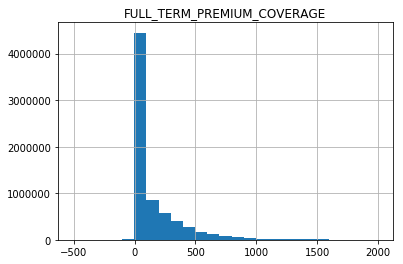

time: 2.09 s


In [27]:
b0_ON[(b0_ON['FULL_TERM_PREMIUM_COVERAGE']!=0)&(b0_ON['FULL_TERM_PREMIUM_COVERAGE']<2000)][['FULL_TERM_PREMIUM_COVERAGE']].hist(bins=25)

In [9]:
b0_ON.head(100000).to_csv(r'C:\Users\john.lan\Desktop\ontario_policies.csv')

time: 1.04 s


In [25]:
#the dataframe has postal code, latitude, longtitude, province and city
#####     set the premium range bigger
with adl.open(('/LeadGen/Raw/Silver/AUTO/Geolocation/postal_code_api.pkl'), 'rb') as f:
    api_df = pickle.load(f)

time: 1.31 s


In [42]:
api_df

(182882, 5)

time: 1.97 ms


In [38]:
b1 = pd.merge(b0,api_df,left_on='POSTAL_CODE',right_on='POSTAL_CODE',how='left')

time: 6.6 s


In [30]:
b2 = b1.drop_duplicates()

time: 36.5 s


In [31]:
b2.shape

(6185001, 18)

time: 4 ms


In [43]:
for i in api_df.columns:
    print(i,api_df[i].nunique())

POSTAL_CODE 182845
CITY 435
PROVINCE 13
LONGITUDE 159147
LATITUDE 137657
time: 114 ms


In [72]:
num_cols = ['AGE_D1',
            'LONGITUDE',
            'LATITUDE',
           'DISTANCE_DRIVEN_ANNUALLY',
           'DRIVING_AGE',
           'VEHICLE_AGE',
           'DRIVERS_NUM',
           'FULL_TERM_PREMIUM_COVERAGE',
           'AUTO_CLAIMS',
           #'CONVICTION_NUM'
           ]

target = ['FULL_TERM_PREMIUM_COVERAGE']

for col in num_cols:
    b2[col] =pd.to_numeric(b2[col],errors='coerce')
    #hold_out_1[col] =pd.to_numeric(hold_out_1[col],errors='coerce')
pd.set_option('float_format', '{:f}'.format)

time: 507 ms


In [96]:
cat_vars=['COVERAGE_CODE_AUTOMOBILE',
 'COMPANY_CODE',
 #'MULTICAR_DISCOUNT_INDICATOR',
 'VEHICLE_CODE1',
 #'DRIVER_SEX_CODE_D1',
 'PROVINCE',
 'CITY',
 'POSTAL_CODE'
]

time: 2.01 ms


In [97]:
for i in cat_vars:
    b2[i] = b2[i].astype('category')
    #hold_out_1[i] = hold_out_1[i].astype('category')

time: 134 ms


In [98]:
input_cols = [
'LONGITUDE',
'LATITUDE',
"AGE_D1",
"COMPANY_CODE",
"COVERAGE_CODE_AUTOMOBILE",
"DISTANCE_DRIVEN_ANNUALLY",
"VEHICLE_CODE1",
"DRIVING_AGE",
"VEHICLE_AGE",
#"MULTICAR_DISCOUNT_INDICATOR",
"DRIVERS_NUM",
"AUTO_CLAIMS",
#"CONVICTION_NUM",
#"DRIVER_SEX_CODE_D1",
'PROVINCE',
'CITY',
'POSTAL_CODE'
]

time: 4.02 ms


In [129]:
b2 = b2[(b2['FULL_TERM_PREMIUM_COVERAGE']>-200)&(b2['FULL_TERM_PREMIUM_COVERAGE']<3000)]

time: 976 ms


In [130]:
#split train data, test data and validation data
x_train = b2[input_cols]
y_train = b2[target]

time: 469 ms


In [131]:
x_train

,LONGITUDE,LATITUDE,AGE_D1,COMPANY_CODE,COVERAGE_CODE_AUTOMOBILE,DISTANCE_DRIVEN_ANNUALLY,VEHICLE_CODE1,DRIVING_AGE,VEHICLE_AGE,DRIVERS_NUM,AUTO_CLAIMS,PROVINCE,CITY,POSTAL_CODE
491,-113.995191,50.941905,51.000000,CGUI,TP,12000.000000,140000,34.000000,1.000000,1.000000,0.000000,AB,CALGARY,T2Z1Z9
492,-113.995191,50.941905,51.000000,CGUI,AB,12000.000000,140000,34.000000,1.000000,1.000000,0.000000,AB,CALGARY,T2Z1Z9
493,-113.995191,50.941905,51.000000,CGUI,COL,12000.000000,140000,34.000000,1.000000,1.000000,0.000000,AB,CALGARY,T2Z1Z9
494,-113.995191,50.941905,51.000000,CGUI,CMP,12000.000000,140000,34.000000,1.000000,1.000000,0.000000,AB,CALGARY,T2Z1Z9
495,-113.995191,50.941905,51.000000,CGUI,2,12000.000000,140000,34.000000,1.000000,1.000000,0.000000,AB,CALGARY,T2Z1Z9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16820356,-116.072900,50.625240,57.000000,WU,COL,20000.000000,364500,31.000000,7.000000,2.000000,0.000000,BC,COLUMBIA-SHUSWAP,V0A1M0
16820357,-116.072900,50.625240,57.000000,WU,SRAP,20000.000000,364500,31.000000,7.000000,2.000000,0.000000,BC,COLUMBIA-SHUSWAP,V0A1M0
16820358,-116.072900,50.625240,57.000000,WU,ZUM3,20000.000000,364500,31.000000,7.000000,2.000000,0.000000,BC,COLUMBIA-SHUSWAP,V0A1M0
16820359,-116.072900,50.625240,57.000000,WU,DISCX,20000.000000,364500,31.000000,7.000000,2.000000,0.000000,BC,COLUMBIA-SHUSWAP,V0A1M0


time: 1.26 s


In [132]:
x_train['PROVINCE'].unique()

[AB, BC, NB, NT, ON, ..., YT, PE, QC, SK, MB]
Length: 13
Categories (13, object): [AB, BC, NB, NT, ..., PE, QC, SK, MB]

time: 106 ms


In [133]:
for i in x_train['PROVINCE'].unique():
    print(i,x_train[(x_train['PROVINCE']==i)].shape)

AB (818315, 14)
BC (5715, 14)
NB (618583, 14)
NT (5654, 14)
ON (4255657, 14)
NS (363245, 14)
NL (45288, 14)
NU (1231, 14)
YT (1506, 14)
PE (63442, 14)
QC (1471, 14)
SK (573, 14)
MB (31, 14)
time: 1.4 s


In [134]:
x_train[x_train['PROVINCE']=='AB'].shape

(818315, 14)

time: 138 ms


In [135]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=99)

time: 3.09 s


In [150]:
zcode

,LONGITUDE,LATITUDE,AGE_D1,COMPANY_CODE,COVERAGE_CODE_AUTOMOBILE,DISTANCE_DRIVEN_ANNUALLY,VEHICLE_CODE1,DRIVING_AGE,VEHICLE_AGE,DRIVERS_NUM,AUTO_CLAIMS,PROVINCE,CITY,POSTAL_CODE
1525024,-77.672186,44.865348,48.000000,CIC,38,16000.000000,264500,74.000000,13.000000,2.000000,0.000000,ON,TUDOR_AND_CASHEL,K0L1W0
13977944,-79.338756,43.748826,29.000000,CGUI,DISSN,10000.000000,147702,11.000000,2.000000,1.000000,1.000000,ON,TORONTO,M3A3B8
15396883,-81.242819,43.786500,27.000000,GORE,44R,10000.000000,378300,10.000000,11.000000,5.000000,0.000000,ON,SOUTH_BRUCE,N0G1H0
15473140,-79.690103,43.441071,40.000000,CIC,47,8000.000000,763700,12.000000,1.000000,1.000000,1.000000,ON,OAKVILLE,L6K2B1
9867848,-114.124260,50.917920,40.000000,ELT,19A,5000.000000,002000,20.000000,32.000000,2.000000,0.000000,AB,CALGARY,T2Y5A5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14504222,-77.093774,45.823425,61.000000,HAL,DISMV,10000.000000,022500,38.000000,13.000000,2.000000,1.000000,ON,LAURENTIAN_VALLEY,K8A2Z8
16520411,-77.613857,44.131020,72.000000,NORW,DISMP,5000.000000,359200,56.000000,11.000000,2.000000,0.000000,ON,QUINTE_WEST,K8V5P6
2284829,-113.638431,53.534760,67.000000,TRG,DISCF,15000.000000,673700,35.000000,10.000000,2.000000,0.000000,AB,EDMONTON,T5T4J1
15435436,-81.247769,43.856259,83.000000,WESW,DISRD,12000.000000,362900,44.000000,19.000000,2.000000,0.000000,ON,SOUTH_BRUCE,N0G1G0


time: 1.06 s


In [136]:
## grid search for the best hyperparameters
model = lgb.LGBMRegressor()
parameters = {    'max_depth' : [-1],
                  'learning_rate' : [0.3],
                  'num_leaves': [25000],
                  'n_estimators': [100],
                  'min_child_weight' : [1],
                  'min_child_sample' : [10],
                  'subsample': [1.0],
                  'colsample_bytree': [1.0],
                  'scale_pos_weight': [1.0],
                  'reg_lambda':[0.0],
                  'boosting_type': ['dart'],     
                  'lambda_l1':[0.0]
             }

grid = ParameterOptimizer(model = model,
                          parameters= parameters,
                          x_train = x_train,
                          y_train = y_train,
                          cat_vars = cat_vars,
                          early_stopping_rounds = 100,
                          eval_set = [(x_val,y_val)])



****To find optimal parameters for lightGBM using GridSearchCV for Regression*****

 Results from Grid Search 

 The best estimator across ALL searched params:
 LGBMRegressor(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
              importance_type='split', lambda_l1=0.0, learning_rate=0.3,
              max_depth=-1, min_child_sample=10, min_child_samples=20,
              min_child_weight=1, min_split_gain=0.0, n_estimators=100,
              n_jobs=-1, num_leaves=25000, objective=None, random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=1.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

 The best score across ALL searched params:
 0.8127135653419217

 The best parameters across ALL searched params:
 {'boosting_type': 'dart', 'colsample_bytree': 1.0, 'lambda_l1': 0.0, 'learning_rate': 0.3, 'max_depth': -1, 'min_child_sample': 10, 'min_child_weight': 1, 'n_estimators': 100, 'num_leaves': 25000, '

In [137]:
#print('Test data R2 score is {:.2%}'.format(r2_score(y_test, grid.predict(x_test))))
print('Val data R2 score is {:.2%}'.format(r2_score(y_val, grid.predict(x_val))))
#print('Train data R2 score is {:.2%}'.format(r2_score(y_train, grid.predict(x_train))))

Val data R2 score is 83.65%
time: 42.9 s


In [104]:
print('Train data R2 score is {:.2%}'.format(r2_score(y_train, grid.predict(x_train))))

Train data R2 score is 95.21%
time: 6min 40s


In [143]:
prediction = pd.DataFrame(grid.predict(x_val),columns = ['preds'])

time: 45.8 s


In [144]:
result = pd.concat([x_val.reset_index(),y_val.reset_index(),prediction],axis = 1)

time: 117 ms


In [124]:
result1 = result[(result['FULL_TERM_PREMIUM_COVERAGE']>-200)&(result['FULL_TERM_PREMIUM_COVERAGE']<3000)]

time: 115 ms


In [149]:
x_train.head()

,LONGITUDE,LATITUDE,AGE_D1,COMPANY_CODE,COVERAGE_CODE_AUTOMOBILE,DISTANCE_DRIVEN_ANNUALLY,VEHICLE_CODE1,DRIVING_AGE,VEHICLE_AGE,DRIVERS_NUM,AUTO_CLAIMS,PROVINCE,CITY,POSTAL_CODE
1525024,-77.672186,44.865348,48.000000,CIC,38,16000.000000,264500,74.000000,13.000000,2.000000,0.000000,ON,TUDOR_AND_CASHEL,K0L1W0
13977944,-79.338756,43.748826,29.000000,CGUI,DISSN,10000.000000,147702,11.000000,2.000000,1.000000,1.000000,ON,TORONTO,M3A3B8
15396883,-81.242819,43.786500,27.000000,GORE,44R,10000.000000,378300,10.000000,11.000000,5.000000,0.000000,ON,SOUTH_BRUCE,N0G1H0
15473140,-79.690103,43.441071,40.000000,CIC,47,8000.000000,763700,12.000000,1.000000,1.000000,1.000000,ON,OAKVILLE,L6K2B1
9867848,-114.124260,50.917920,40.000000,ELT,19A,5000.000000,002000,20.000000,32.000000,2.000000,0.000000,AB,CALGARY,T2Y5A5


time: 21 ms


In [145]:
result['FULL_TERM_PREMIUM_COVERAGE'].describe()

count   618072.000000
mean       135.395847
std        238.171150
min       -199.636364
25%         14.000000
50%         40.000000
75%        160.000000
max       2993.000000
Name: FULL_TERM_PREMIUM_COVERAGE, dtype: float64

time: 140 ms


In [146]:
result['preds'].describe()

count   618072.000000
mean       133.178439
std        215.163038
min       -219.596826
25%         17.562648
50%         44.602845
75%        155.727087
max       2786.884890
Name: preds, dtype: float64

time: 40 ms


In [128]:
print('Train data R2 score is {:.2%}'.format(r2_score(result1['FULL_TERM_PREMIUM_COVERAGE'], result1['preds'])))

Train data R2 score is 82.60%
time: 49 ms


In [37]:
x_train.columns

Index(['AGE_D1', 'COMPANY_CODE', 'COVERAGE_CODE_AUTOMOBILE',
       'DISTANCE_DRIVEN_ANNUALLY', 'VEHICLE_CODE1', 'DRIVING_AGE',
       'VEHICLE_AGE', 'DRIVERS_NUM', 'PROVINCE', 'CITY', 'FSA'],
      dtype='object')

time: 4 ms


In [223]:
#from sklearn.externals import joblib
# save model
#0.81
joblib.dump(grid, r'C:\Users\john.lan\Desktop\model_1.pkl')

['C:\\Users\\john.lan\\Desktop\\model_1.pkl']

time: 1.71 s
